In [3]:
import requests as req
from bs4 import BeautifulSoup
import json
import pandas as pd
from standardize import *
from key import api_key
from key import g_api_key
import re
import os
import bokeh as bo
import numpy as np 
import matplotlib as mp
from helper import *
import geopandas as gp
from shapely.geometry import Point

In [4]:
ln_list = ['rats','rat','mice','mouse',\
'racoon','racoons','possum','vermin','rodent','rodents','roach','roaches','cockroach','cockroaches','termite','termites']

url_sql = "https://data.milwaukee.gov/api/3/action/datastore_search?resource_id"

rats_endpoint = "resource_id=bf2b508a-5bfa-49da-8846-d87ffeee020a&q=rats"

historical = 'bf2b508a-5bfa-49da-8846-d87ffeee020a'
current = 'abdfe983-e856-40cd-bee2-85e78454344a'

df = pd.DataFrame()  #pull_data(url_sql, rats_endpoint, api_key)

for rec_id in [historical, current]:
    for rodent_end in ln_list:
        rodent_endpoint = '='+rec_id+'&q='+rodent_end
        new_df = pull_data(url_sql,rodent_endpoint,api_key)
        new_df['lookup_term'] = rodent_end
        df = df.append(new_df)

#df.drop_duplicates(inplace=True)

offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset0
True
offset50000
True
offset0


/Users/ayaspan/anaconda3/envs/mke_calls/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True
offset0
True
offset50000
True


In [ ]:
df = pd.read_csv('rodents.csv')

In [5]:
df.shape

(2646, 8)

In [6]:
df.iloc[18].CASECLOSUREREASONDESCRIPTION

''

In [7]:
df.head()

CASECLOSUREREASONDESCRIPTION       CLOSEDDATETIME  \
0                                                     2011-11-16 08:15:26   
1  Record number 3164787 is a request for Sanitat...  2018-11-27 10:31:13   
2  Record number 3162955 is a request for Sanitat...  2018-11-19 11:20:37   
3  Record number 3154445 is a request for Sanitat...  2018-11-09 09:46:37   
4  Record number 3149741 is a request for Sanitat...  2018-10-18 10:05:35   

          CREATIONDATE          OBJECTDESC                        TITLE  \
0  2011-10-26 20:27:57  3820 N HUMBOLDT BL        Rats Or Rat Harborage   
1  2018-11-20 15:05:54    1115 E WRIGHT ST            Tree Trimming Web   
2  2018-11-15 13:11:44      5910 N 37TH ST     Call Back Sanitation Web   
3  2018-10-26 11:19:48      1337 N 55TH ST  Cart Requests - Garbage Web   
4  2018-10-16 11:58:51      3835 N 79TH ST  Cart Requests - Garbage Web   

         _id lookup_term      rank  
0  1496343.0        rats  0.057309  
1    16955.0        rats  0.057309  
2    19222.0        rats  0.057309  
3    29264.0        rats  0.057309  
4    35181.0        rats  0.057309

In [8]:
cols = list(df.columns)
cols.remove('lookup_term')

In [9]:
df = df.groupby(cols).apply(lambda x: ','.join(x.lookup_term)).to_frame().reset_index().rename(columns={'0':'cats'})

In [10]:
df.rename(columns={0:'categories'},inplace=True)

In [11]:
df.head()

CASECLOSUREREASONDESCRIPTION       CLOSEDDATETIME         CREATIONDATE  \
0                               2011-11-16 08:15:26  2011-10-26 20:27:57   
1                               2011-12-01 08:15:28  2011-11-24 19:03:40   
2                               2011-12-01 08:15:29  2011-11-24 19:08:25   
3                               2012-02-20 09:59:58  2011-12-24 23:41:44   
4                               2012-02-21 08:16:54  2012-02-02 18:17:51   

                  OBJECTDESC                  TITLE        _id      rank  \
0         3820 N HUMBOLDT BL  Rats Or Rat Harborage  1496343.0  0.057309   
1             2123 N 47TH ST  Rats Or Rat Harborage  1495292.0  0.057309   
2            4712 W LLOYD ST  Rats Or Rat Harborage  1495290.0  0.057309   
3  2904 W WISCONSIN AV # 101  Rats Or Rat Harborage  1493156.0  0.057309   
4            4712 W LLOYD ST  Rats Or Rat Harborage  1486784.0  0.057309   

  categories  
0   rats,rat  
1   rats,rat  
2   rats,rat  
3   rats,rat  
4   rats,rat

In [12]:
titles_df = df.groupby('TITLE').size().to_frame().reset_index().rename(columns={0:'cts','TITLE':'issue'}).sort_values('cts', ascending=False)
tt_5 = titles_df[:5]

In [13]:
categories_df = df.groupby('categories').size().to_frame().reset_index().rename(columns={0:'cts'}).sort_values('cts', ascending=False)

In [14]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from math import pi


output_notebook()
#output_file('vbar.html')

#data = {'issues': list(tt_5.issues), 'cts': np.ndarray(tt_5.cts)}

source = ColumnDataSource(data=dict(issue=tt_5.issue, cts=np.array(tt_5.cts)))

issue = source.data['issue'].tolist()

#print(dict(issues=list(tt_5.issue), cts=np.array(tt_5.cts)))

p = figure(x_range=tt_5.issue,plot_width=400, plot_height=400,toolbar_location=None)
p.vbar(x='issue', width=.9, bottom=0, source = source,
        top='cts', fill_color=factor_cmap('issue', palette=Spectral6, factors=tt_5.issue))
p.xaxis.major_label_orientation = pi/2.7
#p.vbar(x =titles_df.issue, width=0.5, top = titles_df.cts, bottom=0,color="firebrick")
show(p)


Loading BokehJS ...

In [15]:
df[df.TITLE=='Mice/Roach Infestation']

Empty DataFrame
Columns: [CASECLOSUREREASONDESCRIPTION, CLOSEDDATETIME, CREATIONDATE, OBJECTDESC, TITLE, _id, rank, categories]
Index: []

In [17]:
tc_5 = categories_df[:5]

source = ColumnDataSource(data=dict(categories=tc_5.categories, cts=np.array(tc_5.cts)))

issue = source.data['categories'].tolist()

p = figure(x_range=tc_5.categories, plot_width=400, plot_height=400,toolbar_location=None)
p.vbar(x='categories', width=.9, bottom=0, source = source,
        top='cts', fill_color=factor_cmap('categories', palette=Spectral6, factors=tc_5.categories))
p.xaxis.major_label_orientation = pi/2.7
#p.vbar(x =titles_df.issue, width=0.5, top = titles_df.cts, bottom=0,color="firebrick")
show(p)

In [56]:
#c(" AV ", " DR ", " ST ", " RD ", " BL ", " PL ",
#                    " LA ", " CR ", " WA ", " CT ", " TR ", " PK ")
#http://maps2.milwaukee.gov/ArcGIS/rest/services/geocode/MAIthenDIME_geocode/GeocodeServer/findAddressCandidates?Street=3820+North+Humboldt+BL&SingleLine=&outFields=Loc_name&outSR=&f=json
import json
from bs4 import BeautifulSoup

def geo_locate(x):
    if not len(x):
        return [None,None,None]
    gl = "http://maps2.milwaukee.gov/ArcGIS/rest/services/geocode/MAIthenDIME_geocode/GeocodeServer/findAddressCandidates?Street="
    address = x.replace(' ','+')
    response = req.get(gl+address+'&SingleLine=&outFields=Loc_name&outSR=&f=json')
    if 'html' in str(response.content):
        soup = BeautifulSoup(response.content,'html.parser')
        #print(soup)
        #for i in soup.find('ul'):
        east, north = re.findall(r'[0-9/.]+',soup.find('ul').text)
        zipcode  = re.findall(r'[0-9]{5}',soup.find('ul').text)[0]
        if zipcode !=None:
            return [east,north,zipcode]
        else:
            return [east,north,None]
    else:
        #print(address)
        #print(response.content)
        res = response.json()
        if not len(res['candidates']):
            return [None,None,None]
        #print(res)
        result = res['candidates'][0]
        #print(result)
        geodata = dict()
        geodata['east'] = result['location']['x']
        geodata['north'] = result['location']['y']
        
        result1 = res['candidates'][1]
        
        geodata['address'] = result1['address']
        
        #print(geodata['address'])
        
        if (len(geodata['address'].split(',')) == 2):
        
            geodata['zip'] = geodata['address'].split(',')[1]
            
        else:
            
            geodata['zip'] = None
            
        #print(geodata['address'])
        
    return [geodata['east'], geodata['north'], geodata['zip']]

In [57]:
df['utm_zip'] = df.OBJECTDESC.apply(lambda x: geo_locate(x))

In [54]:
df.utm_zip.tail()

2550    [2562623.6858014404, 363739.24942488456,  53207]
2551     [2532781.4447490927, 415529.0855607738,  53218]
2552     [2547794.732782273, 392340.90181008715,  53208]
2553     [2536159.739935282, 366801.42942045926,  53219]
2554      [2540418.631161882, 391224.9931794932,  53208]
Name: utm_zip, dtype: object

In [441]:
df['easting'] = df.utm_zip.apply(lambda x: float(x[0]) if x[0] !=None else None)
df['northing'] = df.utm_zip.apply(lambda x: float(x[1]) if x[1] !=None else None)
df['point'] = df.utm_zip.apply(lambda x: Point([float(x[0]),float(x[1])]) if x[1] !=None else None)
df['zip'] = df.utm_zip.apply(lambda x: x[2] if x[2] !=None else None)

In [442]:
df.to_csv('rodents.csv')

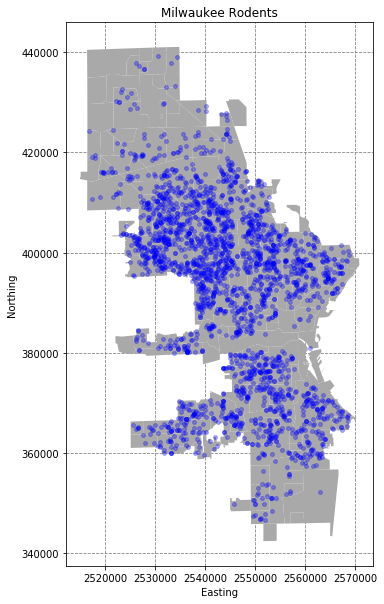

In [443]:
mil_link= 'neighborhood2.shp'
mil = gp.read_file(mil_link)
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

#colors
#https://matplotlib.org/gallery/color/colormap_reference.html

#cmap = ListedColormap(['winter'], name='winter')

fig,ax = plt.subplots(1, 1, figsize=(20,10))
mil.plot(color='darkgray', ax =ax)

event_locs = gp.GeoDataFrame(df[['point']],
                            crs=mil.crs).rename(columns={'point':'geometry'})

event_locs.plot(ax=ax, 
                                color = 'blue', 
                                marker = '.',
                                alpha = .3,
                                markersize = 60)

ax.set(xlabel = 'Easting',
      ylabel='Northing',
      title="Milwaukee Rodents")
ax.set_axisbelow(True)
ax.yaxis.grid(color ='gray',
             linestyle='dashed')
ax.xaxis.grid(color ='gray',
             linestyle='dashed')


In [458]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

mil.iloc[0].geometry.contains(df.iloc[0].point)

False

In [493]:
def count_points_poly(df, poly, r_type = None):
    count = 0
    
    if r_type:
        df  = df[df.categories.str.contains(r_type)]

    for index, row in df.iterrows():
        if pd.notnull(row['easting']):
        
            if poly.contains(row['point']):
                count+=1
    return count




In [492]:

df[df.categories.str.contains('rat')]

CASECLOSUREREASONDESCRIPTION       CLOSEDDATETIME  \
0                                                        2011-11-16 08:15:26   
1                                                        2011-12-01 08:15:28   
2                                                        2011-12-01 08:15:29   
3                                                        2012-02-20 09:59:58   
4                                                        2012-02-21 08:16:54   
5                                                        2012-02-21 08:16:55   
6                                                        2012-02-24 08:16:58   
7                                                        2012-02-24 08:16:58   
10                                                       2012-02-28 08:07:11   
11                                                       2012-02-28 08:22:12   
12                                                       2012-03-02 08:17:03   
13                                                       2012-04-19 16:25:47   
14    08/10/15 K Kenitz - Inspection per rat complai...  2015-08-13 08:16:11   
17    1/26/16 K Kenitz - Inspection per rat complain...  2016-01-28 08:16:18   
18    10-1-15 A clean up order was previously issued...  2015-10-05 17:16:19   
19    10/12/15 K. Kenitz (286-3601) -- An inspection...  2015-10-15 08:16:57   
25    11-11-2016 10:27:57: Workflow Task Investigati...  2016-11-11 09:27:57   
26    11-7-2017 14:56:58: Workflow Task Investigatio...  2017-07-11 13:56:58   
27    11-8-2017 16:12:19: Workflow Task Investigatio...  2017-08-11 15:12:20   
33    11/3/15 Inspected by D.Fink 286-3603. An inspe...  2015-11-05 17:16:23   
34    11/3/15 K. Kenitz (286-3601) -- An inspection ...  2015-11-05 17:16:11   
37    12-5-2017 9:20:54: Workflow Task Investigation...  2017-05-12 08:20:55   
38    12/21/15 K Kenitz - Inspection per rat complai...  2015-12-28 13:16:22   
39    12/21/15 K. Kenitz (286-3601) - Inspection per...  2015-12-23 12:16:15   
40    12/8/15 K Kenitz - Inspection per rat complain...  2015-12-10 08:16:19   
43    15-11-2016 8:29:42: Workflow Task Investigatio...  2016-11-15 07:29:42   
44    15-2-2017 9:51:24: Workflow Task Investigation...  2017-02-15 08:51:24   
45    15-2-2017 9:52:42: Workflow Task Investigation...  2017-02-15 08:52:43   
46    16-11-2016 12:36:57: Workflow Task Investigati...  2016-11-16 11:36:58   
47    17-11-2016 11:33:1: Workflow Task Investigatio...  2016-11-17 10:33:01   
...                                                 ...                  ...   
2315  Record number 3106344 is a request for Sanitat...  2018-08-09 09:23:11   
2319  Record number 3106815 is a request for Sanitat...  2018-08-10 09:31:39   
2327  Record number 3110591 is a request for Sanitat...  2018-08-13 10:09:44   
2331  Record number 3112018 is a request for Sanitat...  2018-08-17 09:31:22   
2342  Record number 3114715 is a request for Sanitat...  2018-08-18 09:38:00   
2350  Record number 3116337 is a request for Sanitat...  2018-08-24 09:46:39   
2361  Record number 3118911 is a request for Sanitat...  2018-09-12 09:25:59   
2368  Record number 3120007 is a request for Sanitat...  2018-08-27 10:16:26   
2375  Record number 3123027 is a request for Sanitat...  2018-09-07 09:44:37   
2376  Record number 3123262 is a request for Sanitat...  2018-09-01 10:16:58   
2377  Record number 3123393 is a request for Sanitat...  2018-09-01 10:19:02   
2379  Record number 3123574 is a request for Sanitat...  2018-09-01 10:24:28   
2398  Record number 3128829 is a request for Sanitat...  2018-09-12 10:33:28   
2403  Record number 3131416 is a request for Sanitat...  2018-09-19 09:31:44   
2407  Record number 3132461 is a request for Sanitat...  2018-09-18 10:06:53   
2421  Record number 3138855 is a request for Sanitat...  2018-09-26 10:55:17   
2422  Record number 3139355 is a request for Sanitat...  2018-09-28 09:38:38   
2455  Record number 3146998 is a request for Sanitat...  2018-10-12 09:58:34   
2460  Record number 3148878

In [497]:
mil['rat_points'] = mil.geometry.apply(lambda x: count_points_poly(df, x))
mil['r_points'] = mil.geometry.apply(lambda x: count_points_poly(df, x,'rat'))

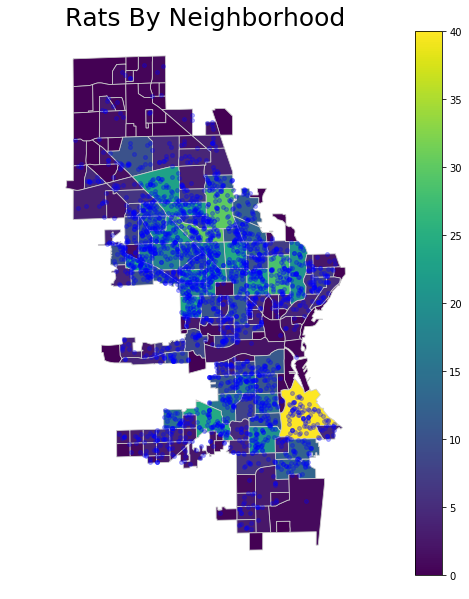

In [498]:
fig,ax = plt.subplots(1, 1, figsize=(20,10))

mil.plot(column='rat_points',cmap = 'viridis', ax =ax, linewidth=0.8, edgecolor='0.8')

event_locs = gp.GeoDataFrame(df[['point']],
                            crs=mil.crs).rename(columns={'point':'geometry'})

event_locs.plot(ax=ax, 
                                color = 'blue', 
                                marker = '.',
                                alpha = .3,
                                markersize = 60)
ax.axis('off')

ax.set_title('Rats By Neighborhood', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.set(xlabel = 'Easting',
#       ylabel='Northing',
#       title="Milwaukee Rodents")
# ax.set_axisbelow(True)
# ax.yaxis.grid(color ='gray',
#              linestyle='dashed')
# ax.xaxis.grid(color ='gray',
#              linestyle='dashed')

vmin = min(mil.r_points)
vmax = max(mil.r_points)
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


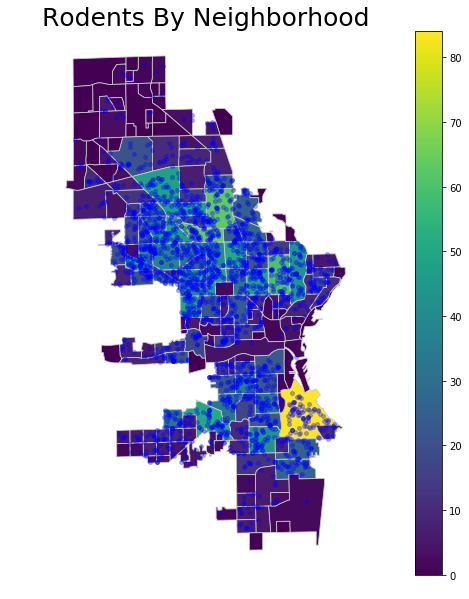

In [496]:
#mil['r_points'] = mil.geometry.apply(lambda x: count_points_poly(df, x))

fig,ax = plt.subplots(1, 1, figsize=(20,10))

mil.plot(column='r_points',cmap = 'viridis', ax =ax, linewidth=0.8, edgecolor='0.8')

event_locs = gp.GeoDataFrame(df[['point']],
                            crs=mil.crs).rename(columns={'point':'geometry'})

event_locs.plot(ax=ax, 
                                color = 'blue', 
                                marker = '.',
                                alpha = .3,
                                markersize = 60)
ax.axis('off')

ax.set_title('Rodents By Neighborhood', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.set(xlabel = 'Easting',
#       ylabel='Northing',
#       title="Milwaukee Rodents")
# ax.set_axisbelow(True)
# ax.yaxis.grid(color ='gray',
#              linestyle='dashed')
# ax.xaxis.grid(color ='gray',
#              linestyle='dashed')

vmin = min(mil.r_points)
vmax = max(mil.r_points)
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


In [444]:
df.head(30)

CASECLOSUREREASONDESCRIPTION       CLOSEDDATETIME  \
0                                                      2011-11-16 08:15:26   
1                                                      2011-12-01 08:15:28   
2                                                      2011-12-01 08:15:29   
3                                                      2012-02-20 09:59:58   
4                                                      2012-02-21 08:16:54   
5                                                      2012-02-21 08:16:55   
6                                                      2012-02-24 08:16:58   
7                                                      2012-02-24 08:16:58   
8                                                      2012-02-28 08:04:48   
9                                                      2012-02-28 08:04:48   
10                                                     2012-02-28 08:07:11   
11                                                     2012-02-28 08:22:12   
12                                                     2012-03-02 08:17:03   
13                                                     2012-04-19 16:25:47   
14  08/10/15 K Kenitz - Inspection per rat complai...  2015-08-13 08:16:11   
15  1-11-16 A clean-up order was written and an or...  2016-01-13 15:16:19   
16  1-11-2016 8:58:52: Workflow Task Investigation...  2016-11-01 07:58:52   
17  1/26/16 K Kenitz - Inspection per rat complain...  2016-01-28 08:16:18   
18  10-1-15 A clean up order was previously issued...  2015-10-05 17:16:19   
19  10/12/15 K. Kenitz (286-3601) -- An inspection...  2015-10-15 08:16:57   
20  10/12/16 Complaint not verified for observable...  2016-10-18 11:32:19   
21  10/13/16 Complaint not verified for observable...  2016-10-18 11:33:42   
22  10/13/16 Complaint not verified for rodent bai...  2016-10-18 11:31:10   
23  10/19/16 Complaint not verified for rodents. P...  2016-10-20 15:23:30   
24  10/27/16 Complaint verified for rodent baiting...  2016-10-27 17:15:56   
25  11-11-2016 10:27:57: Workflow Task Investigati...  2016-11-11 09:27:57   
26  11-7-2017 14:56:58: Workflow Task Investigatio...  2017-07-11 13:56:58   
27  11-8-2017 16:12:19: Workflow Task Investigatio...  2017-08-11 15:12:20   
28  11/1/16 Complaint not verified for observable ...  2016-11-02 08:50:01   
29  11/12/15 Inspected by D.Fink. A clean up order...  2015-11-14 08:16:45   

           CREATIONDATE                 OBJECTDESC                      TITLE  \
0   2011-10-26 20:27:57         3820 N HUMBOLDT BL      Rats Or Rat Harborage   
1   2011-11-24 19:03:40             2123 N 47TH ST      Rats Or Rat Harborage   
2   2011-11-24 19:08:25            4712 W LLOYD ST      Rats Or Rat Harborage   
3   2011-12-24 23:41:44  2904 W WISCONSIN AV # 101      Rats Or Rat Harborage   
4   2012-02-02 18:17:51            4712 W LLOYD ST      Rats Or Rat Harborage   
5   2012-02-02 18:20:08             2123 N 47TH ST      Rats Or Rat Harborage   
6   2012-02-15 19:40:03        2301 W MC KINLEY AV      Rats Or Rat Harborage   
7   2012-02-15 22:41:27             1335 N 43RD ST      Rats Or Rat Harborage   
8   2011-12-01 10:40:32                                               ROACHES   
9   2011-12-01 10:43:02                                        RODENT CONTROL   
10  2011-12-01 10:14:48                                                  RATS   
11  2011-11-23 12:23:41                                           RATS & MICE   
12  2012-02-27 16:50:16     4115 W HIGHLAND BL # 7      Rats Or Rat Harborage   
13  2012-02-24 09:23:57         5575 N 74TH ST # 2      Rats Or Rat Harborage   
14  2015-08-02 15:55:33         8500 W TOWNSEND ST          Animal Issues Web   
15  2016-01-08 11:08:16    3133 W WISCONSIN AV # A     Debris/Litter/Mess Web   
16  2016-10-13 09:15:51          4807 W LUSCHER AV  Building in Disrepair Web   
17  2016-01-21 12:09:10             3924 N 77TH ST          Animal Issues Web   
18  2015-09-29 14:53:51              431 N 34TH ST     Debris/Litte

In [453]:
#[2561754.957419626, 403103.5373421761, 53212]
p2 = Proj(proj="utm",zone=16,datum='NAD27')
x2, y2 = transform(p2, p1, 2561754.957419626,  403103.5373421761)
print(x2, y2)

-68.75432133684838 3.462999888213009


In [446]:
# import utm
# from pyproj import Proj

# #utm.to_latlon()
# #16T
# #+proj=utm +zone=19 +ellps=GRS80 +datum=NAD83 +units=m +no_defs
# p1 = Proj(proj='latlong',datum='WGS84', inverse=True)
# x1 = -87.9249; y1 = 43.0422
# #p2 = Proj(proj="utm",zone=16,datum='NAD27', inverse=True)
# #x2, y2 = transform(p1, p2, x1, y1)
# #print("%s  %s" % (str(x2)[:9],str(y2)[:9]))

# myProj = Proj(proj='utm', zone=16, strict='T', datum="NAD27")

# def to_utm(x):
#     #print(x)
#     if(x[1] !=None and x[0] != None):
#         #tup = myProj(float(x[1]),float(x[0])+2000000.0, inverse=True)
#         p2 = Proj(proj="utm",zone=16,datum='NAD27')
#         x2, y2 = transform(p2, p1, x[1], str(float(x[0])))
#         #tup = utm.to_latlon(float(x[1]),float(x[0])+2000000.0,16,'T')
#         return [y2,x2]
#     else:
#         return (None,None)

# df['lat_long'] = df.utm_zip.apply(lambda x: to_utm(x))
# #df['northing'] = df.utm_zip.apply(lambda x: float(x[1]) if x[1] !=None else None)

In [447]:
# df['long'] = df.lat_long.apply(lambda x: x[1])
# df['lat'] = df.lat_long.apply(lambda x: x[0])

In [448]:
# import folium
# from folium import plugins
# import matplotlib.pyplot as plt

In [449]:
# df_fol = df[pd.notnull(df.lat)]
# df_fol = df[pd.notnull(df.long)]

In [450]:
# df_fol.head(40)

CASECLOSUREREASONDESCRIPTION       CLOSEDDATETIME  \
0                                                      2011-11-16 08:15:26   
1                                                      2011-12-01 08:15:28   
2                                                      2011-12-01 08:15:29   
3                                                      2012-02-20 09:59:58   
4                                                      2012-02-21 08:16:54   
5                                                      2012-02-21 08:16:55   
6                                                      2012-02-24 08:16:58   
7                                                      2012-02-24 08:16:58   
12                                                     2012-03-02 08:17:03   
13                                                     2012-04-19 16:25:47   
14  08/10/15 K Kenitz - Inspection per rat complai...  2015-08-13 08:16:11   
15  1-11-16 A clean-up order was written and an or...  2016-01-13 15:16:19   
16  1-11-2016 8:58:52: Workflow Task Investigation...  2016-11-01 07:58:52   
17  1/26/16 K Kenitz - Inspection per rat complain...  2016-01-28 08:16:18   
18  10-1-15 A clean up order was previously issued...  2015-10-05 17:16:19   
19  10/12/15 K. Kenitz (286-3601) -- An inspection...  2015-10-15 08:16:57   
20  10/12/16 Complaint not verified for observable...  2016-10-18 11:32:19   
21  10/13/16 Complaint not verified for observable...  2016-10-18 11:33:42   
22  10/13/16 Complaint not verified for rodent bai...  2016-10-18 11:31:10   
23  10/19/16 Complaint not verified for rodents. P...  2016-10-20 15:23:30   
24  10/27/16 Complaint verified for rodent baiting...  2016-10-27 17:15:56   
25  11-11-2016 10:27:57: Workflow Task Investigati...  2016-11-11 09:27:57   
26  11-7-2017 14:56:58: Workflow Task Investigatio...  2017-07-11 13:56:58   
27  11-8-2017 16:12:19: Workflow Task Investigatio...  2017-08-11 15:12:20   
28  11/1/16 Complaint not verified for observable ...  2016-11-02 08:50:01   
29  11/12/15 Inspected by D.Fink. A clean up order...  2015-11-14 08:16:45   
30  11/2/15 Inspected by D.Fink 286-3603. An inspe...  2015-11-05 17:16:19   
31  11/2/15 Inspected by D.Fink 286-3603. An inspe...  2015-11-05 17:16:20   
32  11/28/16 Complaint not verified for rodents. R...  2016-11-29 16:03:56   
33  11/3/15 Inspected by D.Fink 286-3603. An inspe...  2015-11-05 17:16:23   
34  11/3/15 K. Kenitz (286-3601) -- An inspection ...  2015-11-05 17:16:11   
35  12-30-15: An inspection verified the complaint...  2016-01-06 08:16:46   
36  12-4-2018 15:13:22: Workflow Task Investigatio...  2018-04-12 14:13:27   
37  12-5-2017 9:20:54: Workflow Task Investigation...  2017-05-12 08:20:55   
38  12/21/15 K Kenitz - Inspection per rat complai...  2015-12-28 13:16:22   
39  12/21/15 K. Kenitz (286-3601) - Inspection per...  2015-12-23 12:16:15   
40  12/8/15 K Kenitz - Inspection per rat complain...  2015-12-10 08:16:19   
41  14-11-2016 17:43:22: Workflow Task Investigati...  2016-11-14 16:43:22   
42  14-3-2017 15:58:45: Workflow Task Investigatio...  2017-03-14 14:58:45   
43  15-11-2016 8:29:42: Workflow Task Investigatio...  2016-11-15 07:29:42   

           CREATIONDATE                 OBJECTDESC  \
0   2011-10-26 20:27:57         3820 N HUMBOLDT BL   
1   2011-11-24 19:03:40             2123 N 47TH ST   
2   2011-11-24 19:08:25            4712 W LLOYD ST   
3   2011-12-24 23:41:44  2904 W WISCONSIN AV # 101   
4   2012-02-02 18:17:51            4712 W LLOYD ST   
5   2012-02-02 18:20:08             2123 N 47TH ST   
6   2012-02-15 19:40:03        2301 W MC KINLEY AV   
7   2012-02-15 22:41:27             1335 N 43RD ST   
12  2012-02-27 16:50:16     4115 W HIGHLAND BL # 7   
13  2012-02-24 09:23:57         5575 N 74TH ST # 2   
14  2015-08-02 15:55:33         8500 W TOWNSEND ST   
15  2016-01-08 11:08:16    3133 W WISCONSIN AV # A   
16  2016-10-13 09:15:51          4807 W LUSCHER AV   
17  2016-01-21 12:09:10             3924 N 77TH ST   
18  2015-09-29 1

In [451]:
# m = folium.Map([43.0422, -87.9249], zoom_start=12)

# #try pyproj, utm dontwork

# for index, row in df_fol.iterrows():
#     #print(row)
#     folium.CircleMarker([row['lat']+20, row['long']],
#                         radius=3,
#                         popup=row['OBJECTDESC'],
#                         fill_color="#3db7e4", # divvy color
#                        ).add_to(m)

# m.save("Map1.html")

In [452]:
# for index, row in df_fol.iterrows():
#     folium.CircleMarker([row['lat'], row['long']],
#                         radius=15,
#                         popup=row['OBJECTDESC'],
#                         fill_color="#3db7e4", # divvy color
#                        ).add_to(m)
#convert to (n, 2) nd-array format for heatmap
# rodentPlace = df_fol[['long', 'lat']].values

# # plot heatmap
# m.add_child(plugins.HeatMap(rodentPlace, radius=15))
# m.save("Map1.html")